In [25]:
import gymnasium as gym
import numpy as np
import random
import matplotlib.pylab as plt

In [26]:
class QAgent():
    def  __init__(self, env, discount_rate=0.97, learning_rate=1):
        self.state_size = env.observation_space.n
        self.action_size = env.action_space.n
        self.actions = env.action_space
        self.current_state = None
        self.current_action = None
        self.eps = 1.0
        self.discount_rate = discount_rate
        self.learning_rate = learning_rate
        self.qtable = np.zeros((self.state_size, self.action_size))
        self.step = 0
    
    def epsilon_greedy(self, state, actions):
        if random.uniform(0,1) < self.eps:
            # explore
            action = actions.sample()
        else:
            # exploit
            action = np.argmax(self.qtable[state,:])
        self.current_state = state
        self.current_action = action
        self.step += 1      
        return action
    
    def update_q_table(self, reward, new_state):
#         for a in range(self.action_size):
#             print(new_state)
#             print(self.qtable[new_state,a])
        q_update = reward + self.discount_rate * np.max(self.qtable[new_state,:]) - self.qtable[self.current_state, self.current_action]
        self.qtable[self.current_state, self.current_action] = self.qtable[self.current_state, self.current_action] + self.learning_rate * q_update

        
    def final_update(self,reward):
        self.qtable[self.current_state, self.current_action] = self.qtable[self.current_state, self.current_action]+ self.learning_rate * (reward - self.qtable[self.current_state, self.current_action])  
# 放到后面
#     if done:
#       self.eps = self.eps * 0.99

In [27]:
def Train_Agent(Agent,episodes, rewards):
    for e in range(episodes):
        # reset the environment
        observation = env.reset()
        state = observation[0]
        terminal = False
        r = 0
        while not terminal and (Agent.step < 99):

            # choose next agent action
            action = Agent.epsilon_greedy(state, env.action_space)

            # take action and observe reward
            new_state, reward, terminated, truncated, info = env.step(action)

            # is the episode done?
            terminal = terminated or truncated
            
            # train agent
            if not terminal:
                Agent.update_q_table(reward, new_state)
            else:
                Agent.final_update(reward)
            Agent.eps = Agent.eps * 0.99
            
            # Update state
            state = new_state
            r += reward
        # Decrease epsilon & reset episode steps
        # Agent.epsilon = np.exp(-decay_rate*episode)
        rewards.append(r)
        Agent.step = 0
    env.close()    
    print(f"Training completed over {episodes} episodes")
    


Training completed over 1000 episodes


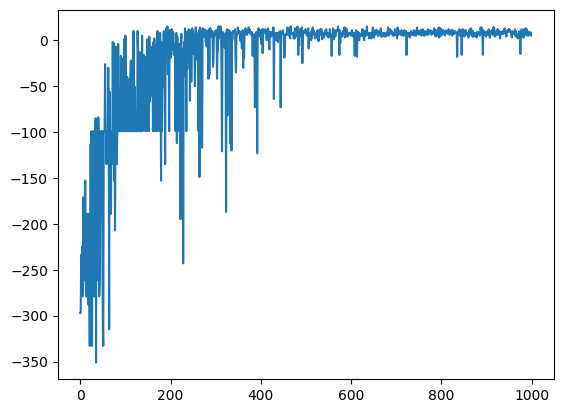

In [28]:
# env = gym.make('Taxi-v3')  
env = gym.make('Taxi-v3')
episodes=1000
env.reset()
rewards = []
Agent=QAgent(env)
Train_Agent(Agent,episodes, rewards)
plt.plot(rewards)
plt.show()
# for _ in range(1000):
#   env.render()
#   env.step(env.action_space.sample()) 
# env.close()